## Example 5 (Log normal distribution - bijector)

In [1]:
import tensorflow_probability as tfp
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tfd = tfp.distributions
# We begin with a standard normal distribution and then apply the Exp bijector
log_normal = tfp.bijectors.Exp()(tfd.Normal(0, 1))

2023-07-22 17:21:29.668252: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-22 17:21:30.171322: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0001:00:00.0, compute capability: 7.5
2023-07-22 17:21:30.174778: I tensorflow/stream_executor/cuda/cuda_driver.cc:739] failed to allocate 7.00M (7340032 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2023-07-22 17:21:30.175628: I tensorflow/stream_executor/cuda/cuda_driver.cc:739] failed to allocate 6.30M (6606080 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2023-07-22 17:21:30.176504: I tensorflow/stream_executor/cuda/

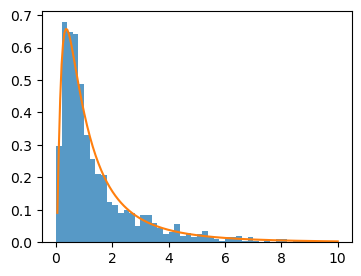

In [7]:
samples = log_normal.sample(1000)
xs = np.linspace(0, 10, 200)
plt.figure(figsize=(4,3))

# plot samples from the distribution
plt.hist(samples.numpy(),density=True, range=(0,10),bins=50, alpha=0.75)

# plot the probability density function of the distribution
plt.plot(xs, log_normal.prob(xs))
plt.show()

As we would expect, if we take the log of the samples, we find that they are normally distributed.

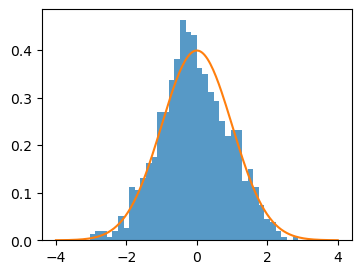

In [8]:
xs = np.linspace(-4, 4, 200)
plt.figure(figsize=(4,3))
# plot the histogram of the log of the samples
plt.hist(np.log(samples.numpy()),density=True, range=(-4,4),bins=50, alpha=0.75)
# plot the original density function
plt.plot(xs, tfd.Normal(0, 1).prob(xs))
plt.show()

## Example 6 (inverse bijectors)

We can also use an inverted bijector if we want to transform variables in the opposite direction to the
original bijector.
In this example, we’re going to create a distribution that is defined on the interval 𝑥 ∈ (−∞, ∞) so that
when we transform 𝑥 to the interval (0, 1) it is uniform over this interval

In [3]:
# a uniform distribution provides a flat distribution on an arbitrary interval
dist_uniform = tfd.Uniform(0, 1)

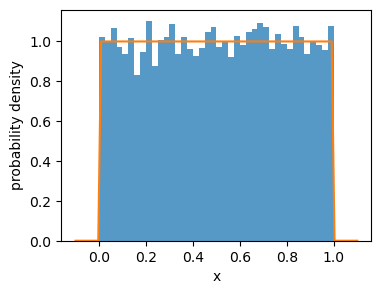

In [4]:
# sample from the distribution and plot the results
samples = dist_uniform.sample(10000)

xs = np.linspace(-0.1,1.1, 100)

plt.figure(figsize=(4,3))
plt.hist(samples.numpy(),density=True, bins=40, alpha=0.75)
plt.plot(xs, dist_uniform.prob(xs))
plt.ylabel('probability density')
plt.xlabel('x')
plt.show()

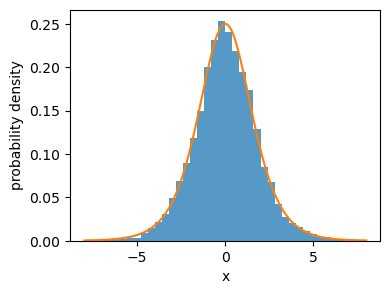

In [6]:
# create inverse bijector
inv_sig_bijector = tfp.bijectors.Invert(tfp.bijectors.Sigmoid())
# apply bijector to uniform distribution to create a new distribution
sigmoid_dist = inv_sig_bijector(tfd.Uniform(0, 1))

# sample from the distribution
samples = sigmoid_dist.sample(10000)
# plot the probability for different values of x
# note that x is not restricted to 0,1
xs = np.linspace(-8,8, 200)

plt.figure(figsize=(4,3))
plt.hist(samples.numpy(),density=True, bins=40, range=(-8,8),alpha=0.75)
plt.plot(xs, sigmoid_dist.prob(xs))
plt.ylabel('probability density')
plt.xlabel('x')
plt.show()

By using the inverse bijector, we’ve created a distribution that is uniform on 0,1 when we perform a
Sigmoid transformation on the random variable it generates

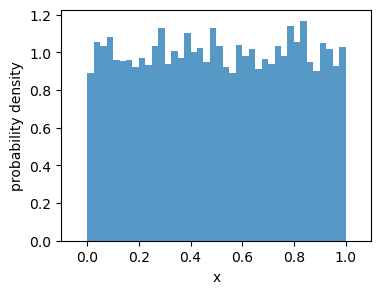

In [7]:
forward_samples = tfp.bijectors.Sigmoid().forward(samples)
plt.figure(figsize=(4,3))
plt.hist(forward_samples.numpy(),density=True, bins=40, range=(0,1),alpha=0.75)
plt.ylabel('probability density')
plt.xlabel('x')
plt.xlim(-0.1,1.1)
plt.show()